In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the Boston dataset 
from sklearn.datasets import load_boston
house_data = load_boston()

In [8]:
print(house_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [10]:
boston = pd.DataFrame(house_data.data)

#Assigning feature_names to columns for data frame
boston.columns = house_data.feature_names
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#Adding the target variable
boston['price'] = house_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [14]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


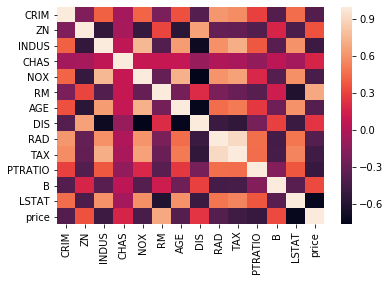

In [15]:
#Creating the heatmap for correlation
sns.heatmap(boston.corr())

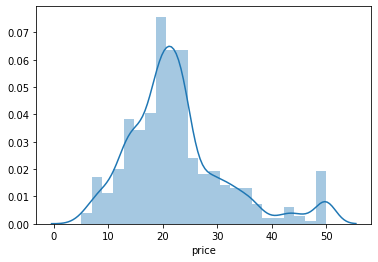

In [16]:
#Creating the distribution plot
sns.distplot(boston['price'])

In [17]:
#Creating the Predictor variable and X and target variable y
X = boston.drop('price',axis=1)
y = boston['price']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
X_train.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,1.0,5.82115,0.0,18.10,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
75,1.0,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94
478,1.0,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
199,1.0,0.03150,95.0,1.47,0.0,0.403,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
84,1.0,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62


In [30]:
lm = sm.OLS(y_train, X_train).fit()


In [31]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     79.69
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           9.36e-95
Time:                        15:37:13   Log-Likelihood:                -1024.1
No. Observations:                 354   AIC:                             2076.
Df Residuals:                     340   BIC:                             2130.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1158      5.641      5.871      0.0

In [32]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [37]:
#Calcuating the VIF value
vif_cal(input_data = boston, dependent_col='price')


,Var,Vif
10,PTRATIO,85.03
5,RM,77.95
4,NOX,73.89
9,TAX,61.23
6,AGE,21.39
11,B,20.10
8,RAD,15.17
7,DIS,14.70
2,INDUS,14.49
12,LSTAT,11.10


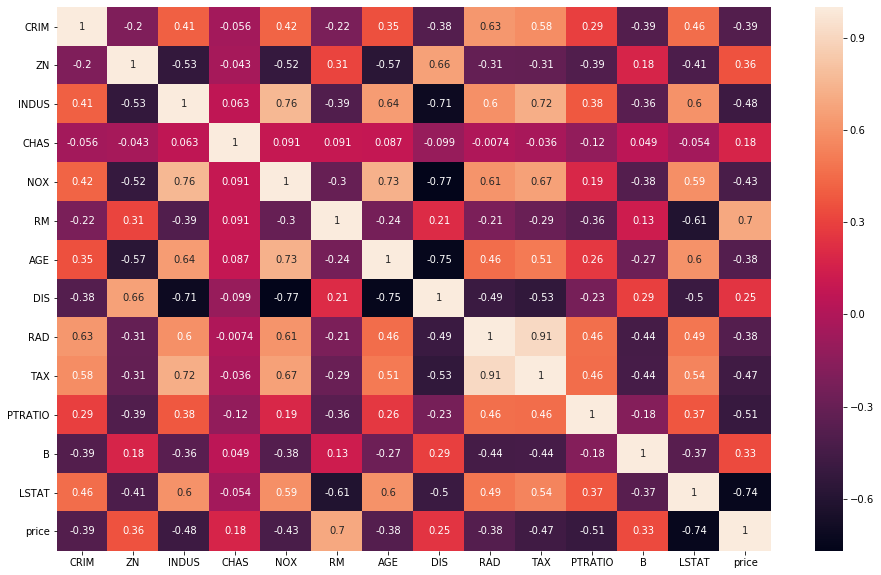

In [38]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(boston.corr(),annot = True)

In [39]:
#Dropping the variable and updating the model
X_train = X_train.drop('INDUS',1)
X_train.head()

,const,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,1.0,5.82115,0.0,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
75,1.0,0.09512,0.0,0.0,0.437,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94
478,1.0,10.23300,0.0,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
199,1.0,0.03150,95.0,0.0,0.403,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
84,1.0,0.05059,0.0,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62


In [46]:
#Creating the secound fitted model
lm_1 = sm.OLS(y_train,X_train).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     94.50
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.35e-96
Time:                        15:52:56   Log-Likelihood:                -1024.4
No. Observations:                 354   AIC:                             2073.
Df Residuals:                     342   BIC:                             2119.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4107      5.607      5.959      0.0

In [50]:
#Removing the age column
X_train = X_train.drop('AGE',1)
X_train.head()

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,1.0,5.82115,0.0,0.0,0.713,6.513,2.8016,24.0,666.0,20.2,393.82,10.29
75,1.0,0.09512,0.0,0.0,0.437,6.286,4.5026,5.0,398.0,18.7,383.23,8.94
478,1.0,10.23300,0.0,0.0,0.614,6.185,2.1705,24.0,666.0,20.2,379.70,18.03
199,1.0,0.03150,95.0,0.0,0.403,6.975,7.6534,3.0,402.0,17.0,396.90,4.56
84,1.0,0.05059,0.0,0.0,0.449,6.389,4.7794,3.0,247.0,18.5,396.90,9.62


In [51]:
#applying the model
lm_2 = sm.OLS(y_train,X_train).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     94.50
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.35e-96
Time:                        15:53:51   Log-Likelihood:                -1024.4
No. Observations:                 354   AIC:                             2073.
Df Residuals:                     342   BIC:                             2119.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4107      5.607      5.959      0.0

In [52]:
#Creating the Prediction using the Final model
#adding the constant variable 
X_test = sm.add_constant(X_test)

C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
X_test.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
198,1.0,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62
229,1.0,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
31,1.0,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04
315,1.0,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50


In [54]:
X_test = X_test.drop(["INDUS","AGE"], axis =1)

In [55]:
X_test.head()

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
198,1.0,0.03768,80.0,0.0,0.404,7.274,7.3090,2.0,329.0,12.6,392.20,6.62
229,1.0,0.44178,0.0,0.0,0.504,6.552,3.3751,8.0,307.0,17.4,380.34,3.76
502,1.0,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
31,1.0,1.35472,0.0,0.0,0.538,6.072,4.1750,4.0,307.0,21.0,376.73,13.04
315,1.0,0.25356,0.0,0.0,0.544,5.705,3.9450,4.0,304.0,18.4,396.42,11.50


In [57]:
#making the predictions
Pred = lm_2.predict(X_test)
Pred.head()

198    34.141861
229    30.603589
502    22.331373
31     18.444537
315    20.715901
dtype: float64

In [59]:
y_test.head()

198    34.6
229    31.5
502    20.6
31     14.5
315    16.2
Name: price, dtype: float64

Text(0, 0.5, 'y_pred')

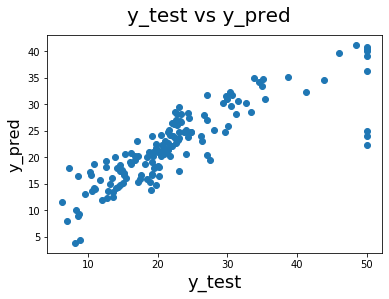

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,Pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

Text(0, 0.5, 'Index')

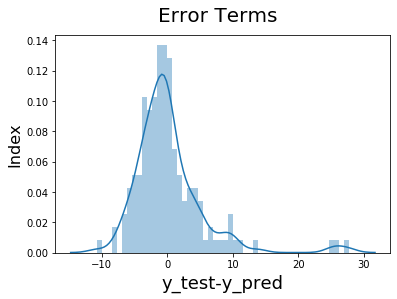

In [71]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-Pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [72]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, Pred)))

RMSE : 5.43673240328453
